In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [50]:
## starting with the inputs

In [51]:
## enter the values in order(all in SI units): Density, YoungModulus, PoissionRatio, width, Length, depth, nodes, elements, elementallength, availNodes, fixedNode

In [52]:
inputs_list = dict() 
for i in range(11):
    data = input('Enter key & value separated by ":", ') 
    temp = data.split(':') 
    inputs_list[temp[0]] = temp[1] 
print()
# Displaying the dictionary 
for key, value in inputs_list.items(): 
    inputs_list[key] = float(value)
    print(f'Key: {key}, Value: {value}') 
print(inputs_list)

Enter key & value separated by ":", Density:7850
Enter key & value separated by ":", YoungModulus:210e9
Enter key & value separated by ":", PoissionRatio:0.3
Enter key & value separated by ":", width:0.01
Enter key & value separated by ":", depth:0.01
Enter key & value separated by ":", length:1
Enter key & value separated by ":", elements:50
Enter key & value separated by ":", nodes:51
Enter key & value separated by ":", elementalLength:0.02
Enter key & value separated by ":", nodesAvail:49
Enter key & value separated by ":", fixedNode:2

Key: Density, Value: 7850
Key: YoungModulus, Value: 210e9
Key: PoissionRatio, Value: 0.3
Key: width, Value: 0.01
Key: depth, Value: 0.01
Key: length, Value: 1
Key: elements, Value: 50
Key: nodes, Value: 51
Key: elementalLength, Value: 0.02
Key: nodesAvail, Value: 49
Key: fixedNode, Value: 2
{'Density': 7850.0, 'YoungModulus': 210000000000.0, 'PoissionRatio': 0.3, 'width': 0.01, 'depth': 0.01, 'length': 1.0, 'elements': 50.0, 'nodes': 51.0, 'elemental

In [53]:
import numpy
elementalLength = inputs_list['length'] / (int(inputs_list['elements']))
nodesPosi = [i * elementalLength  for i in range(int(inputs_list['elements'])+1)]
nodesPosi= numpy.transpose(nodesPosi).reshape(-1,1)

In [54]:
ke=np.array([[12,6*inputs_list['elementalLength'],-12,6*inputs_list['elementalLength']],[6*inputs_list['elementalLength'],4*(inputs_list['elementalLength'])*(inputs_list['elementalLength']),-6*inputs_list['elementalLength'],2*(inputs_list['elementalLength'])*(inputs_list['elementalLength'])],[-12,-6*inputs_list['elementalLength'],12,-6*inputs_list['elementalLength']],[6*inputs_list['elementalLength'],2*(inputs_list['elementalLength'])*(inputs_list['elementalLength']),-6*inputs_list['elementalLength'],4*(inputs_list['elementalLength'])*(inputs_list['elementalLength'])]])

In [55]:
ke

array([[ 1.2e+01,  1.2e-01, -1.2e+01,  1.2e-01],
       [ 1.2e-01,  1.6e-03, -1.2e-01,  8.0e-04],
       [-1.2e+01, -1.2e-01,  1.2e+01, -1.2e-01],
       [ 1.2e-01,  8.0e-04, -1.2e-01,  1.6e-03]])

In [56]:
me = inputs_list['Density'] * 0.0001 * inputs_list['elementalLength'] * np.array([[156, 22 * inputs_list['elementalLength'], 54, -13 * inputs_list['elementalLength']],
                                                                                    [22 * inputs_list['elementalLength'], 4 * inputs_list['elementalLength'] * inputs_list['elementalLength'], 13 * inputs_list['elementalLength'], -3 * inputs_list['elementalLength'] * inputs_list['elementalLength']],
                                                                                    [54, 13 * inputs_list['elementalLength'], 156, -22 * inputs_list['elementalLength']],
                                                                                    [-13 * inputs_list['elementalLength'], -3 * inputs_list['elementalLength'] * inputs_list['elementalLength'], -22 * inputs_list['elementalLength'], 4 * inputs_list['elementalLength'] * inputs_list['elementalLength']]]) / 420


In [57]:
me

array([[ 5.83142857e-03,  1.64476190e-05,  2.01857143e-03,
        -9.71904762e-06],
       [ 1.64476190e-05,  5.98095238e-08,  9.71904762e-06,
        -4.48571429e-08],
       [ 2.01857143e-03,  9.71904762e-06,  5.83142857e-03,
        -1.64476190e-05],
       [-9.71904762e-06, -4.48571429e-08, -1.64476190e-05,
         5.98095238e-08]])

In [58]:
nodesPosi

array([[0.  ],
       [0.02],
       [0.04],
       [0.06],
       [0.08],
       [0.1 ],
       [0.12],
       [0.14],
       [0.16],
       [0.18],
       [0.2 ],
       [0.22],
       [0.24],
       [0.26],
       [0.28],
       [0.3 ],
       [0.32],
       [0.34],
       [0.36],
       [0.38],
       [0.4 ],
       [0.42],
       [0.44],
       [0.46],
       [0.48],
       [0.5 ],
       [0.52],
       [0.54],
       [0.56],
       [0.58],
       [0.6 ],
       [0.62],
       [0.64],
       [0.66],
       [0.68],
       [0.7 ],
       [0.72],
       [0.74],
       [0.76],
       [0.78],
       [0.8 ],
       [0.82],
       [0.84],
       [0.86],
       [0.88],
       [0.9 ],
       [0.92],
       [0.94],
       [0.96],
       [0.98],
       [1.  ]])

In [73]:
len(nodesPosi)

51

In [59]:
inputs_list['nodes'] = int(inputs_list['nodes'])

In [60]:
## global stiffness matrix, mass matrix
kg=np.zeros((inputs_list['nodes']*2, inputs_list['nodes']*2))
mg = np.zeros((inputs_list['nodes']*2,inputs_list['nodes']*2))

In [61]:
EI = 175
K = ( EI /(elementalLength*elementalLength*elementalLength) ) * ke
m = me
K1 = np.zeros((inputs_list['nodes']*2, inputs_list['nodes']*2))
m1 = np.zeros((inputs_list['nodes']*2, inputs_list['nodes']*2))
for i in range(1,int(inputs_list['elements'])+1):
    K1[2*i-2:2*i+2,2*i-2:2*i+2]= K
    kg += K1
    K1 = np.zeros((inputs_list['nodes']*2, inputs_list['nodes']*2))
print('Global Stiffness Matrix is:')
print(kg)
for i in range(1,int(inputs_list['elements'])+1):
    m1[2*i-2:2*i+2,2*i-2:2*i+2]= m
    mg += m1
    m1 = np.zeros((inputs_list['nodes']*2, inputs_list['nodes']*2))
print('Global Mass Matrix is:')
print(mg)

Global Stiffness Matrix is:
[[ 2.625e+08  2.625e+06 -2.625e+08 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 2.625e+06  3.500e+04 -2.625e+06 ...  0.000e+00  0.000e+00  0.000e+00]
 [-2.625e+08 -2.625e+06  5.250e+08 ...  0.000e+00  0.000e+00  0.000e+00]
 ...
 [ 0.000e+00  0.000e+00  0.000e+00 ...  7.000e+04 -2.625e+06  1.750e+04]
 [ 0.000e+00  0.000e+00  0.000e+00 ... -2.625e+06  2.625e+08 -2.625e+06]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  1.750e+04 -2.625e+06  3.500e+04]]
Global Mass Matrix is:
[[ 5.83142857e-03  1.64476190e-05  2.01857143e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.64476190e-05  5.98095238e-08  9.71904762e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.01857143e-03  9.71904762e-06  1.16628571e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.19619048e-07
   9.71904762e-06 -4.48571429e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.71904762e-06
   5.83142

In [62]:
np.shape(kg)

(102, 102)

In [63]:
rows_to_remove = [0, 1, -1, -2]
cols_to_remove = [0, 1, -1, -2]

In [64]:
kg_removed = np.delete(kg, rows_to_remove, axis=0)
kg_removed = np.delete(kg_removed, cols_to_remove, axis=1)
mg_removed = np.delete(mg, rows_to_remove, axis=0)
mg_removed = np.delete(mg_removed, cols_to_remove, axis=1)

In [65]:
np.shape(kg_removed)

(98, 98)

In [66]:
from scipy.linalg import eigh

In [74]:
# GETTING EIGEN VALUES AND EIGEN VECTORS
w, V = eigh(kg_removed, mg_removed)
freq = np.diag(w)
print(len(freq))
for i in range(len(freq)):
    freq[i] = np.sqrt(freq[i]) / (2 * np.pi)

98


In [75]:
w

array([1.11590691e+05, 8.47922995e+05, 3.25871793e+06, 8.90474746e+06,
       1.98713432e+07, 3.87648420e+07, 6.87135695e+07, 1.13368471e+08,
       1.76904203e+08, 2.64020727e+08, 3.79945556e+08, 5.30436800e+08,
       7.21787169e+08, 9.60829103e+08, 1.25494121e+09, 1.61205620e+09,
       2.04067051e+09, 2.54985575e+09, 3.14927233e+09, 3.84918519e+09,
       4.66048210e+09, 5.59469450e+09, 6.66402110e+09, 7.88135442e+09,
       9.26031021e+09, 1.08152600e+10, 1.25613665e+10, 1.45146220e+10,
       1.66918889e+10, 1.91109430e+10, 2.17905167e+10, 2.47503432e+10,
       2.80111967e+10, 3.15949282e+10, 3.55244876e+10, 3.98239266e+10,
       4.45183650e+10, 4.96338957e+10, 5.51973840e+10, 6.12360796e+10,
       6.77768879e+10, 7.48449905e+10, 8.24611555e+10, 9.06362176e+10,
       9.93589116e+10, 1.08566439e+11, 1.18065004e+11, 1.27295500e+11,
       1.34734196e+11, 1.71240703e+11, 1.81414405e+11, 1.94962722e+11,
       2.10617689e+11, 2.27956764e+11, 2.46861690e+11, 2.67330076e+11,
      

In [76]:
np.shape(w)

(98,)

In [77]:
V

array([[-9.78784292e-03, -2.63844034e-02, -5.05832141e-02, ...,
        -2.85274191e-01,  1.92444623e-01, -9.69098493e-02],
       [-9.63137696e-01, -2.56550668e+00, -4.85833498e+00, ...,
        -1.56411401e+02,  1.05153990e+02, -5.28446198e+01],
       [-3.78997398e-02, -9.97048819e-02, -1.86348387e-01, ...,
        -2.76760509e-01,  1.91462937e-01, -9.78552198e-02],
       ...,
       [ 1.83241274e+00, -4.69375720e+00,  8.51929241e+00, ...,
        -3.68393333e+02, -2.49753500e+02, -1.26143138e+02],
       [-9.78784291e-03,  2.63844034e-02, -5.05832141e-02, ...,
         2.85274191e-01,  1.92444623e-01,  9.69098493e-02],
       [ 9.63137695e-01, -2.56550668e+00,  4.85833498e+00, ...,
        -1.56411401e+02, -1.05153990e+02, -5.28446198e+01]])

In [88]:
np.shape(V)

(98, 98)

In [78]:
freq

array([[5.31660157e+01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.46554223e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.87305220e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.94313138e+05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.96470888e+05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.97784363e+05]])

In [79]:
np.shape(freq)

(98, 98)

In [80]:
first_five_columns = V[:, :5]

In [89]:
np.shape(first_five_columns)

(98, 5)

In [90]:
filtered_array = first_five_columns[::2]

In [91]:
np.shape(filtered_array)

(49, 5)

In [92]:
modified_array = np.insert(filtered_array, 0, 0, axis=0)
modified_array = np.insert(modified_array, modified_array.shape[0], 0, axis=0)

In [93]:
np.shape(modified_array)

(51, 5)

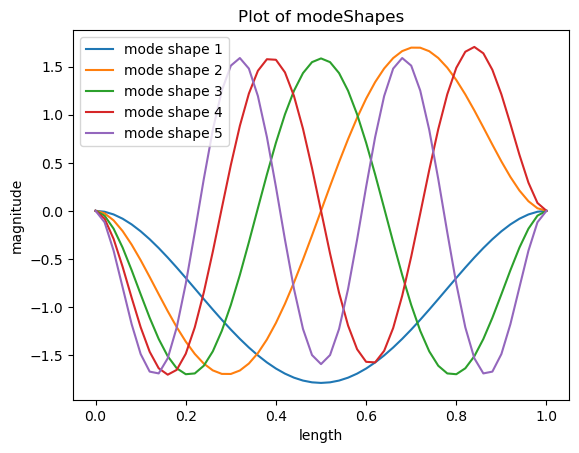

In [94]:
for column in modified_array.T: 
    plt.plot(nodesPosi, column)
plt.xlabel('length')
plt.ylabel('magnitude')
plt.title('Plot of modeShapes')
plt.legend(['mode shape 1', 'mode shape 2', 'mode shape 3', 'mode shape 4', 'mode shape 5'])  
plt.show()

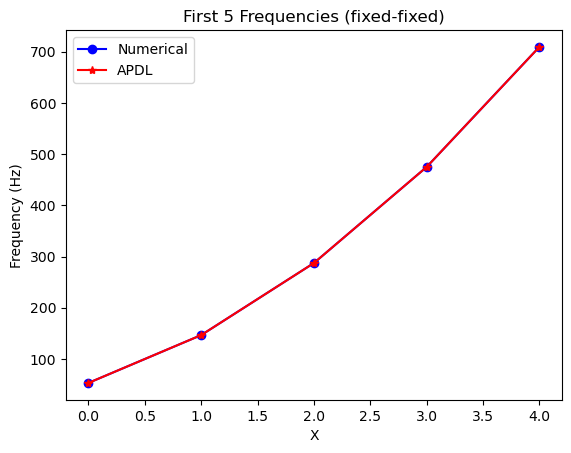

In [95]:
first_five = nat_freq[:5]
APDL = [53.187, 146.76, 288.16, 477.39, 715.10]
x = np.arange(len(first_five))
#plotting
plt.plot(x, first_five, marker='o', linestyle='-', color='b')
plt.plot(x, first_five, marker='*', linestyle='-', color='r')
plt.xlabel('X')
plt.ylabel('Frequency (Hz)')
plt.title('First 5 Frequencies (fixed-fixed)')
plt.legend(['Numerical', 'APDL'])
plt.show()